In [ ]:
# 201500684 박종혁

In [ ]:
# Lab5  1. 행렬 예제 코딩

In [ ]:
# 벡터 덧셈

In [56]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re, math, random
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from functools import partial, reduce

import numpy as np

def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v, w)]

v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

vector_add(v, w)

[12, 16, 20, 24, 28]

In [10]:
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

In [11]:
%timeit vector_add(v,w)
%timeit np.array(v) + np.array(w)

599 ns ± 3.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.75 µs ± 8.83 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# 벡터 뺄셈

In [12]:
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_subtract(v, w)

[-10, -10, -10, -10, -10]

In [13]:
np.array(v) - np.array(w)

array([-10, -10, -10, -10, -10])

In [ ]:
# 벡터 리스트 덧셈

In [15]:
v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

# Version 1
def vector_sum(vectors):
    return reduce(vector_add, vectors)

vectors = [v, w, v, w, v, w]
vector_sum(vectors)

# Version 2
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

[36, 48, 60, 72, 84]

In [17]:
np.sum(vectors, axis = 0)

array([36, 48, 60, 72, 84])

In [ ]:
# 벡터 스칼라 곱

In [20]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

scalar = 3
scalar_multiply(scalar, v)

[3, 9, 15, 21, 27]

In [19]:
scalar * np.array(v)

array([ 3,  9, 15, 21, 27])

In [ ]:
# 벡터 리스트 평균

In [21]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,v,v,v])

[1.0, 2.0, 3.0, 4.0]

In [25]:
np.mean([v,v,v,v], axis=0)

array([1., 2., 3., 4.])

In [ ]:
# 벡터의 내적

In [26]:
def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v, w)

-20

In [27]:
np.dot(v,w)

-20

In [ ]:
# 벡터 성분 제곱 값의 합

In [29]:
def sum_of_squares(v):
    return dot(v,v)

v = [1,2,3,4]
sum_of_squares(v)

30

In [30]:
# 제곱의 합의 제곱근
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)

5.477225575051661

In [31]:
np.linalg.norm(v)

5.477225575051661

In [ ]:
# 두 벡터 사이의 거리

In [32]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v,w))

def distance(v, w):
    return math.sqrt(squared_distance(v,w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

squared_distance(v,w)

100

In [33]:
distance(v,w)

10.0

In [34]:
np.linalg.norm(np.subtract(v,w))

10.0

In [ ]:
# 행렬 형태

In [35]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

example_matrix = [[1,2,3,4,5], [11,12,13,14,15], [21,22,23,24,25]]

shape(example_matrix)
get_row(example_matrix, 0)
get_column(example_matrix, 3)

(3, 5)

[1, 2, 3, 4, 5]

[4, 14, 24]

In [38]:
np.shape(example_matrix)
example_matrix = np.array(example_matrix)
example_matrix[0]
example_matrix[:,3]

(3, 5)

array([1, 2, 3, 4, 5])

array([ 4, 14, 24])

In [ ]:
# 단위 행렬 생성

In [40]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i, j) for j in range(num_cols)]
           for i in range(num_rows)]

def is_diagonal(i, j):
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [41]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# 이진 관계

In [48]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
              [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 
              [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], 
              [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
              [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 
              [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] 

friendships[0][2] == 1
friendships[0][8] == 1

friend_of_five = [i for i, is_friend in enumerate(friendships[5]) if is_friend]
print(friend_of_five)

True

False

[4, 6, 7]


In [ ]:
# 행렬 덧셈

In [50]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("Cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
    
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[1., 0., 0.], [0., 1., 2.]]
B = [[5., 4., 3.], [2., 2., 2.]]

matrix_add(A, B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [58]:
np.add(A, B)

array([[6., 4., 3.],
       [2., 3., 4.]])

In [ ]:
# 벡터 점곱 그래프

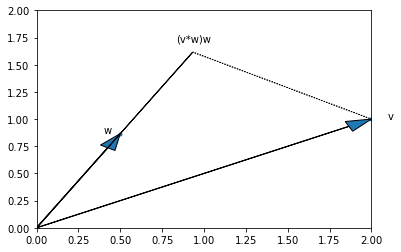

In [76]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0, 0]
    
    plt.arrow(0, 0, v[0], v[1],
             width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    
    plt.arrow(0,0, w[0], w[1],
             width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v*w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
             linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o), marker='.')
    plt.axis([0,2,0,2])
    plt.show()
    
    
%matplotlib inline
make_graph_dot_product_as_vector_projection(plt)

In [ ]:
# 2. 행렬연산 구현

In [ ]:
# A. 파이썬 날코딩

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("## 행렬 점곱 ##")
# 행렬 점곱
def my_matrix_dot(A, B, multiply_fn):
    return [[ multiply_fn(i, j) for j in range(len(B[0]))] for i in range(len(A))]
            
def matrix_multiply(a, b):
    result = 0
    for i in range(len(A[0])):
        result += A[a][i] * B[i][b]
    
    return result

A = [[1,2,3],
    [4,5,6]]

B = [[1,2],
    [3,4],
    [5,6]]


my_matrix_dot(A, B, matrix_multiply)

print("## 전치 행렬 ##")
# 전치 행렬

A_t = [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]
B_t = [[B[j][i] for j in range(len(B))] for i in range(len(B[0]))]

A_t
B_t

## 행렬 점곱 ##


[[22, 28], [49, 64]]

## 전치 행렬 ##


[[1, 4], [2, 5], [3, 6]]

[[1, 3, 5], [2, 4, 6]]

In [ ]:
# B. 넘파이 라이브러리 코딩

In [13]:
import numpy as np

print("## 행렬 점곱 ##")
# 행렬 점곱
A = [[1,2,3],
    [4,5,6]]

B = [[1,2],
    [3,4],
    [5,6]]

np.dot(A, B)

print("## 전치 행렬 ##")
# 전치 행렬
np.transpose(A)
np.transpose(B)

## 행렬 점곱 ##


array([[22, 28],
       [49, 64]])

## 전치 행렬 ##


array([[1, 4],
       [2, 5],
       [3, 6]])

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
# 201500684 박종혁